In [59]:
# =====================================
# Schritt 0: Setup & Bibliotheken
# =====================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

# Optional: Anzeigen von mehreren Outputs pro Zelle
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"





In [60]:
# =====================================
# Schritt 1: Daten laden & erste Sichtung
# =====================================

# Pfad zu Päckli 1
base_path_p1 = "C:/Users/Kay/OneDrive/Dokumente/Kay/School-Work/MsC Wirtschaftsinformatik/FS25/BINA/Semesterarbeit/Datensets für Semesterarbeit/archive (3)/"

# Lade die Datensätze aus Päckli 1
df_meals = pd.read_csv(base_path_p1 + "detailed_meals_macros_CLEANED.csv")
df_nutrition = pd.read_csv(base_path_p1 + "Food_and_Nutrition__.csv")

# Pfad zu Päckli 2
base_path_p2 = "C:/Users/Kay/OneDrive/Dokumente/Kay/School-Work/MsC Wirtschaftsinformatik/FS25/BINA/Semesterarbeit/Datensets für Semesterarbeit/archive (4)/FINAL FOOD DATASET/"

# Lade alle Group-Dateien einzeln (du kannst später auch mergen)
group1 = pd.read_csv(base_path_p2 + "FOOD-DATA-GROUP1.csv")
group2 = pd.read_csv(base_path_p2 + "FOOD-DATA-GROUP2.csv")
group3 = pd.read_csv(base_path_p2 + "FOOD-DATA-GROUP3.csv")
group4 = pd.read_csv(base_path_p2 + "FOOD-DATA-GROUP4.csv")
group5 = pd.read_csv(base_path_p2 + "FOOD-DATA-GROUP5.csv")

# Oder direkt zusammenführen:
food_groups_combined = pd.concat([group1, group2, group3, group4, group5], ignore_index=True)

# Vorschau
food_groups_combined.head()

# BLV Nährwerte: https://www.blv.admin.ch/blv/de/home/lebensmittel-und-ernaehrung/ernaehrung/empfehlungen-informationen/naehrstoffe/naehrstoffzufuhr-dynamische-tabelle.html
excel_path = r"C:/Users/Kay/OneDrive/Dokumente/Kay/School-Work/MsC Wirtschaftsinformatik/FS25/BINA/Semesterarbeit/Datensets für Semesterarbeit/Nutrient_requirements_CH - 2022.xlsx"
df_blv = pd.read_excel(excel_path)

# Vorschau
df_meals.info()
df_meals.head()
df_blv.head()



,Unnamed: 0.1,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,0,0,cream cheese,51,5.0,2.9,1.3,0.200,0.8,0.500,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070
1,1,1,neufchatel cheese,215,19.4,10.9,4.9,0.800,3.1,2.700,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100
2,2,2,requeijao cremoso light catupiry,49,3.6,2.3,0.9,0.000,0.9,3.400,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400
3,3,3,ricotta cheese,30,2.0,1.3,0.5,0.002,1.5,0.091,...,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196
4,4,4,cream cheese low fat,30,2.3,1.4,0.6,0.042,1.2,0.900,...,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ages                     1698 non-null   int64  
 1   Gender                   1698 non-null   object 
 2   Height                   1698 non-null   int64  
 3   Weight                   1698 non-null   int64  
 4   Activity Level           1698 non-null   object 
 5   Dietary Preference       1698 non-null   object 
 6   Daily Calorie Target     1698 non-null   int64  
 7   Protein                  1698 non-null   int64  
 8   Sugar                    1698 non-null   float64
 9   Sodium                   1698 non-null   float64
 10  Calories                 1698 non-null   int64  
 11  Carbohydrates            1698 non-null   int64  
 12  Fiber                    1698 non-null   float64
 13  Fat                      1698 non-null   int64  
 14  Breakfast Suggestion    

,Ages,Gender,Height,Weight,Activity Level,Dietary Preference,Daily Calorie Target,Protein,Sugar,Sodium,...,Dinner Protein.1,Dinner Carbohydrates.1,Dinner Fats,Snack Suggestion,Snacks Calories,Snacks Protein,Snacks Carbohydrates,Snacks Fats,Disease,Lunch Fats
0,25,Male,180,80,Moderately Active,Omnivore,2000,120,125.0,24.0,...,60.0,250.0,60.0,Greek yogurt with fruit,150,10,20,5,Weight Gain,12.0
1,32,Female,165,65,Lightly Active,Vegetarian,1600,80,100.0,16.0,...,5.0,31.0,27.0,Apple with almond butter,180,4,30,8,"Weight Gain, Hypertension, Heart Disease",8.0
2,48,Male,175,95,Sedentary,Vegan,2200,100,150.0,20.0,...,55.0,150.0,15.0,Trail mix,300,8,34,20,Weight Gain,15.0
3,55,Female,160,70,Very Active,Omnivore,2500,140,175.0,28.0,...,20.0,163.0,27.0,Banana with peanut butter,210,5,30,9,Weight Gain,10.0
4,62,Male,170,85,Sedentary,Vegetarian,2000,80,125.0,16.0,...,6.3,186.0,22.0,Fruit and nut mix,250,6,28,15,Weight Gain,9.0


,Unnamed: 0,Dietary Reference Values for Switzerland - Version of June 2022,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43
0,sex,Age,Energy (kcal/d),Total Carbohydrates\n(% TEI),Fibers (g/d),Total fat\n (% TEI),ALA (% TEI),EPA + DHA (mg/d),DHA (mg/d),LA (% TEI),...,Iodine\n(µg/d),Iron\n(mg/d),Magnesium (mg/d),Manganese (mg/d),Molybdenum (µg/d),Phosphorus (mg/d),Potassium (mg/d),Selenium (µg/d),Sodium\n(g/d),Zinc\n(mg/d)
1,female,7 to 11 m,573 to 673,NaN,NaN,40,0.5,NaN,100,4,...,90,11,80,0.02 to 0.5,10,160,750,15,0.2,2.9
2,female,12 to 17 m,712 to 1096,45 to 60,10,35 to 40,0.5,NaN,100,4,...,90,7,170,0.5,15,250,800,15,1.1,4.3
3,female,18 to 23 m,712 to 1096,45 to 60,10,35 to 40,0.5,NaN,100,4,...,90,7,170,0.5,15,250,800,15,1.1,4.3
4,female,2 y,712 to 1096,45 to 60,10,35 to 40,0.5,250,NaN,4,...,90,7,170,0.5,15,250,800,15,1.1,4.3


In [61]:
#  In diesem Schritt bereinigen wir die df_meals-Tabelle:

# Leere Zellen prüfen, Doppelte Einträge entfernen, Datentypen prüfen
df_meals.isnull().sum()
df_meals.drop_duplicates(subset=[col for col in df_meals.columns if col != "Disease_List"], inplace=True)
df_meals.dtypes

# Disease-Spalte vorbereiten für Analyse
df_meals["Disease_List"] = df_meals["Disease"].fillna("").apply(lambda x: [d.strip() for d in x.split(",") if d.strip() != ""])

# Neu: Zähle Krankheiten je Person (0 bis n Krankheiten)
df_meals["Disease_Count"] = df_meals["Disease_List"].apply(len)

# Optional: Disease als Tuple zur Gruppierung (nur wenn .groupby() oder .value_counts() verwendet werden soll)
df_meals["Disease_Tuple"] = df_meals["Disease_List"].apply(lambda x: tuple(x))



Ages                       0
Gender                     0
Height                     0
Weight                     0
Activity Level             0
Dietary Preference         0
Daily Calorie Target       0
Protein                    0
Sugar                      0
Sodium                     0
Calories                   0
Carbohydrates              0
Fiber                      0
Fat                        0
Breakfast Suggestion       0
Breakfast Calories         0
Breakfast Protein          0
Breakfast Carbohydrates    1
Breakfast Fats             0
Lunch Suggestion           0
Lunch Calories             0
Lunch Protein              0
Lunch Carbohydrates        0
Dinner Suggestion          0
Dinner Calories            0
Dinner Protein.1           0
Dinner Carbohydrates.1     0
Dinner Fats                0
Snack Suggestion           0
Snacks Calories            0
Snacks Protein             0
Snacks Carbohydrates       0
Snacks Fats                0
Disease                    0
Lunch Fats    

Ages                         int64
Gender                      object
Height                       int64
Weight                       int64
Activity Level              object
Dietary Preference          object
Daily Calorie Target         int64
Protein                      int64
Sugar                      float64
Sodium                     float64
Calories                     int64
Carbohydrates                int64
Fiber                      float64
Fat                          int64
Breakfast Suggestion        object
Breakfast Calories         float64
Breakfast Protein          float64
Breakfast Carbohydrates    float64
Breakfast Fats             float64
Lunch Suggestion            object
Lunch Calories             float64
Lunch Protein              float64
Lunch Carbohydrates        float64
Dinner Suggestion           object
Dinner Calories            float64
Dinner Protein.1           float64
Dinner Carbohydrates.1     float64
Dinner Fats                float64
Snack Suggestion    

In [ ]:
# =====================================
# Validierung: Datenqualität & Integrität
# =====================================

# 📋 Diese Zelle überprüft automatisch zentrale Qualitätsaspekte:
# - Gibt es noch leere Zellen?
# - Enthält jede Spalte den erwarteten Datentyp?
# - Stimmen Anzahl Zeilen mit anderen Tabellen überein?

# Fehlende Werte checken
missing = df_meals.isnull().sum()
print("\n# Fehlende Werte pro Spalte:")
print(missing[missing > 0])

# Erwartete Datentypen
expected_types = {
    "Ages": np.int64,
    "Gender": object,
    "Calories": np.int64,
    "Disease_List": list,
    "Disease_Tuple": tuple,
    "Disease_Count": np.int64
}

# Vergleich Ist vs. Erwartet
print("\n# Typvalidierung:")
for col, expected_type in expected_types.items():
    actual_type = df_meals[col].iloc[0].__class__
    if actual_type != expected_type:
        print(f"Typabweichung in '{col}': erwartet {expected_type}, ist {actual_type}")

# Anzahl Zeilen prüfen
print("\n# Anzahl Datensätze:", len(df_meals))



# Fehlende Werte pro Spalte:
Breakfast Carbohydrates    1
dtype: int64

# Typvalidierung:
Typabweichung in 'Gender': erwartet <class 'object'>, ist <class 'str'>

# Anzahl Datensätze: 1698


In [68]:
# Zeige ALLE Zeilen mit fehlenden Werten in 'Breakfast Carbohydrates'
fehlende = df_meals[df_meals["Breakfast Carbohydrates"].isnull()]
pd.set_option('display.max_columns', None)  # zeigt ALLE Spalten an
display(fehlende)


,Ages,Gender,Height,Weight,Activity Level,Dietary Preference,Daily Calorie Target,Protein,Sugar,Sodium,Calories,Carbohydrates,Fiber,Fat,Breakfast Suggestion,Breakfast Calories,Breakfast Protein,Breakfast Carbohydrates,Breakfast Fats,Lunch Suggestion,Lunch Calories,Lunch Protein,Lunch Carbohydrates,Dinner Suggestion,Dinner Calories,Dinner Protein.1,Dinner Carbohydrates.1,Dinner Fats,Snack Suggestion,Snacks Calories,Snacks Protein,Snacks Carbohydrates,Snacks Fats,Disease,Lunch Fats,Disease_List,Disease_Count,Disease_Tuple
1697,54,Female,198,75,Sedentary,Vegetarian,1867,140,93.0,28.0,1862,186,22.32,62,Scrambled eggs with whole wheat toast,219.0,14.0,NaN,20.0,Chicken and vegetable stir-fry,685.0,26.0,43.0,Pasta with marinara sauce and veggies,388.0,24.0,32.6,21.6,Banana with peanut butter,210,5,30,9,Weight Gain,10.0,[Weight Gain],1,"(Weight Gain,)"


In [69]:
#Entfernen der Zeilen mit fehlenden Werten in 'Breakfast Carbohydrates'
df_meals = df_meals.dropna(subset=["Breakfast Carbohydrates"])

<Axes: xlabel='Disease_Count', ylabel='Sugar'>

Text(0.5, 1.0, 'Zuckerzufuhr bei Personen mit und ohne Krankheit')

Text(0.5, 0, 'Krankheit vorhanden?')

Text(0, 0.5, 'Zucker (g pro Tag)')

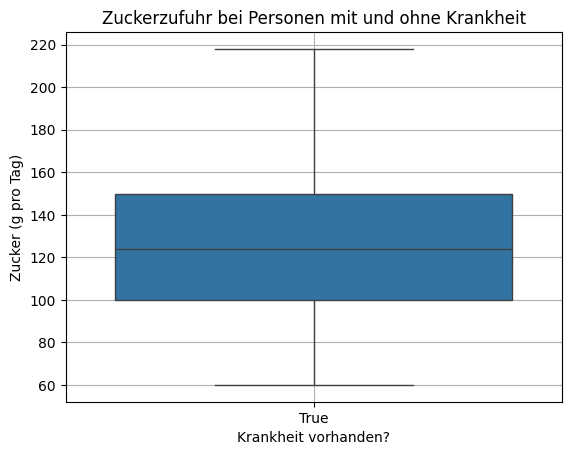

Personen mit Krankheit weisen im Median einen leicht höheren Zuckerkonsum auf.


In [71]:
# =====================================
# Schritt 3: Explorative Analyse nach IBCS
# =====================================

# 🧠 Frage: Unterscheiden sich kranke und gesunde Personen im Zuckerkonsum?
# 🎯 Ziel: Visuelle Verteilung und Mittelwertunterschied zeigen

sns.boxplot(data=df_meals, x=df_meals["Disease_Count"] > 0, y="Sugar")
plt.title("Zuckerzufuhr bei Personen mit und ohne Krankheit")
plt.xlabel("Krankheit vorhanden?")
plt.ylabel("Zucker (g pro Tag)")
plt.grid(True)
plt.show()

# SAY-Prinzip (Kommentar zur Grafik)
print("Personen mit Krankheit weisen im Median einen leicht höheren Zuckerkonsum auf.")


In [75]:
# 📦 Importiere notwendige Module
import os
from nbformat import read
from nbformat.validator import validate

# 📍 Definiere den vollständigen Pfad zu deinem Notebook
notebook_path = r"C:\Users\Kay\OneDrive\Dokumente\Kay\School-Work\MsC Wirtschaftsinformatik\FS25\BINA\Github\MScWinf_Gruppenarbeit_Sem2\onlyAnalysis_Ernährung.ipynb"

# 🧪 Überprüfe, ob die Datei existiert
if not os.path.exists(notebook_path):
    print(f"⚠️ Datei nicht gefunden: {notebook_path}")
    print("Bitte überprüfen Sie den Pfad und stellen Sie sicher, dass die Datei existiert.")
    # Exit the script gracefully
    import sys
    sys.exit(1)
    # 🗂️ Zeige den absoluten Pfad der Datei
    absolute_path = os.path.abspath(notebook_path)
    print(f"📂 Absoluter Pfad der Datei: {absolute_path}")
# 📖 Öffne das Notebook und lade den Inhalt
with open(notebook_path, "r", encoding="utf-8") as f:
    nb = read(f, as_version=4)

# ✅ Validierung durchführen
validate(nb)
print("✅ Das Notebook ist gültig und im richtigen Format!")


⚠️ Datei nicht gefunden: C:\Users\Kay\OneDrive\Dokumente\Kay\School-Work\MsC Wirtschaftsinformatik\FS25\BINA\Github\MScWinf_Gruppenarbeit_Sem2\onlyAnalysis_Ernährung.ipynb
Bitte überprüfen Sie den Pfad und stellen Sie sicher, dass die Datei existiert.


SystemExit: 1

C:\Users\Kay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py:3554: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
